In [1]:
import numpy as np
import numpy.ma as ma
import netCDF4 as nc
import matplotlib.pyplot as plt
from salishsea_tools import viz_tools
%matplotlib inline

In [2]:
with nc.Dataset('/home/mdunphy/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc') as mesh_mask:
    umask = mesh_mask.variables['umask'][0,...]
    vmask = mesh_mask.variables['vmask'][0,...]
    tmask = mesh_mask.variables['tmask'][0,...]
    e3t_0 = mesh_mask.variables['e3t_0'][0,...]
    e3u_00 = mesh_mask.variables['e3u_0'][:]
    e3u_0 = mesh_mask.variables['e3u_0'][0,...]
    e3v_0 = mesh_mask.variables['e3v_0'][0,...]
    e1t = mesh_mask.variables['e1t'][0,...]
    e2t = mesh_mask.variables['e2t'][0,...]
    e1u = mesh_mask.variables['e1u'][0,...]
    e2u = mesh_mask.variables['e2u'][0,...]
    e1v = mesh_mask.variables['e1v'][0,...]
    e2v = mesh_mask.variables['e2v'][0,...]
    
# H1
#VVLA = nc.Dataset('/home/mdunphy/MEOPAR/SalishSea/VVLA/SalishSea_00382410_restart.nc')
#VVLB = nc.Dataset('/home/mdunphy/MEOPAR/SalishSea/VVLB/SalishSea_00382410_restart.nc')

# H24
VVLA = nc.Dataset('/home/mdunphy/MEOPAR/SalishSea/VVLA/SalishSea_00384480_restart.nc')
VVLB = nc.Dataset('/home/mdunphy/MEOPAR/SalishSea/VVLB/SalishSea_00384480_restart.nc')



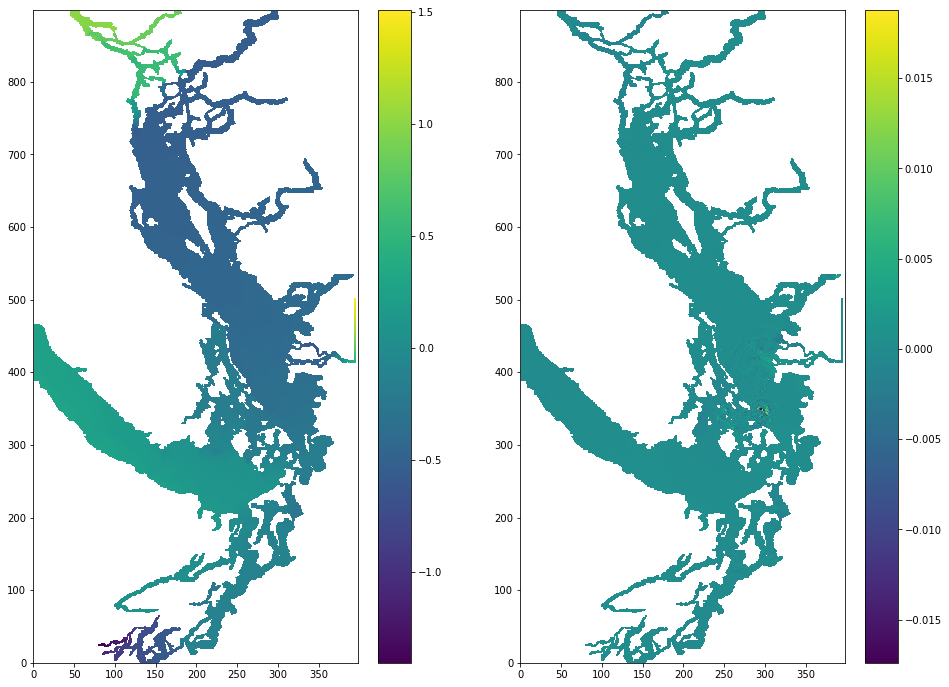

In [3]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16, 12))
ssh = ma.masked_array(VVLA.variables['sshn'][0,:,:], mask=1-tmask[0,...])
mesh = ax1.pcolormesh(ssh)
fig.colorbar(mesh,ax=ax1)

ssh2 = ma.masked_array(VVLB.variables['sshn'][0,:,:], mask=1-tmask[0,...])
mesh = ax2.pcolormesh(ssh-ssh2)
fig.colorbar(mesh,ax=ax2)

In [3]:
fse3u = np.zeros(umask.shape)
e12t = e1t*e2t
r1_e12u = 1.0/(e1u*e2u)
for k in range(40):
    fse3tk = VVLA.variables['fse3t_b'][0,k,...]
    A = e12t[:,:-1] * (fse3tk[:,:-1] - e3t_0[k,:,:-1])
    B = e12t[:,1:]  * (fse3tk[:,1:]  - e3t_0[k,:,1:] )
    fse3u[k,:,:-1] = 0.5*umask[k,:,:-1]*r1_e12u[:,:-1]*(A+B)
fse3u += e3u_0

In [4]:
ht_0 = np.einsum('kji,kji->ji',e3t_0,tmask)
hu_0 = np.einsum('kji,kji->ji',e3u_0,umask)
hv_0 = np.einsum('kji,kji->ji',e3v_0,vmask)

# In U

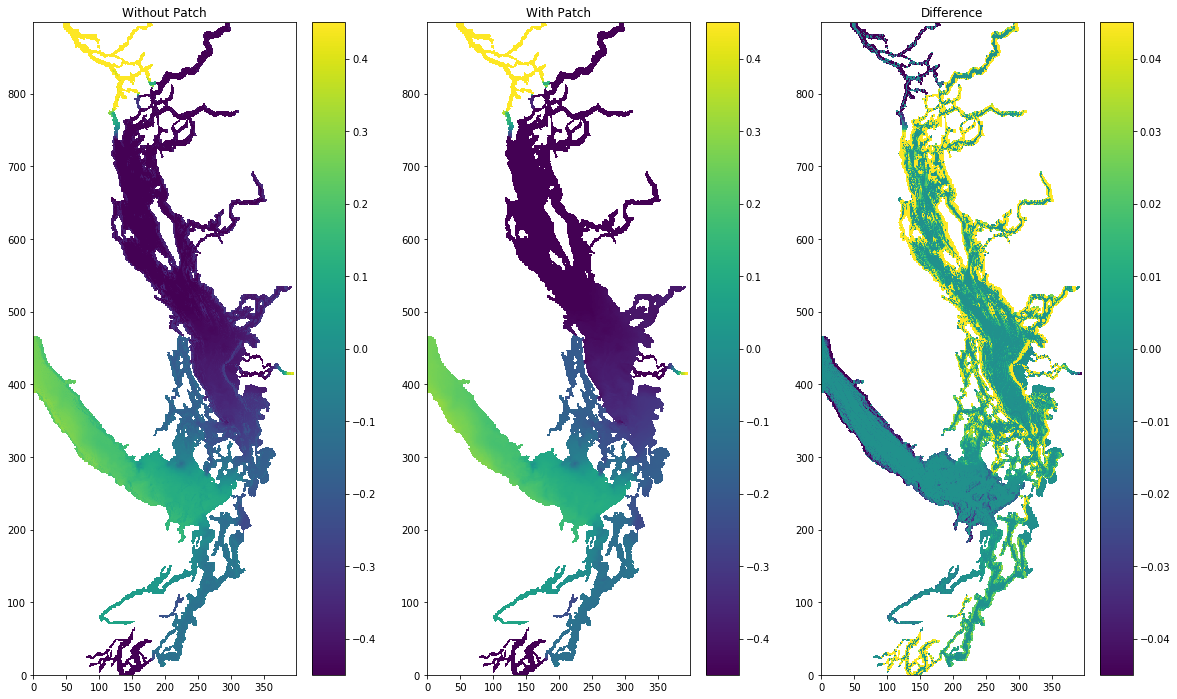

In [6]:
#ussh1 = ma.masked_array( np.einsum('kji,kji->ji',fse3u,umask) - hu_0, mask=1-umask[0,...])
ussh1 = ma.masked_array( np.einsum('kji,kji->ji',VVLA.variables['fse3u_n'][0,...],umask) - hu_0, mask=1-umask[0,...])
ussh2 = ma.masked_array( np.einsum('kji,kji->ji',VVLB.variables['fse3u_n'][0,...],umask) - hu_0, mask=1-umask[0,...])
c=0.45
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,12))
def show(ax,dta,ttl,K=1):
    mesh = ax.pcolormesh(dta,vmin=-c/K,vmax=c/K)
    fig.colorbar(mesh,ax=ax)
    #viz_tools.set_aspect(ax)
    ax.set_title(ttl)
show(ax1, ussh1, 'Without Patch')
show(ax2, ussh2, 'With Patch')
show(ax3, (ussh1-ussh2), 'Difference', K=10)
plt.savefig('In_U_difference.png', bbox_inches='tight')

# In V

In [ ]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=((20,16)))
vssh = ma.masked_array((vmask * fse3u).sum(axis=0) - hv,mask=1-vmask[0,...])
mesh1 = ax1.pcolormesh(vssh)
fig.colorbar(mesh1,ax=ax1)
viz_tools.set_aspect(ax1)
ax1.set_title('From averaged')

vssh2 = ma.masked_array((restart2.variables['fse3v_n'][0,...] * vmask).sum(axis=0) - hv,mask=1-vmask[0,...])
mesh2 = ax2.pcolormesh(vssh2)
fig.colorbar(mesh2,ax=ax2)
viz_tools.set_aspect(ax2)
ax2.set_title('From restart')

difference = vssh - vssh2
mesh3 = ax3.pcolormesh(difference)
fig.colorbar(mesh3,ax=ax3)
viz_tools.set_aspect(ax3)
ax3.set_title('Difference');

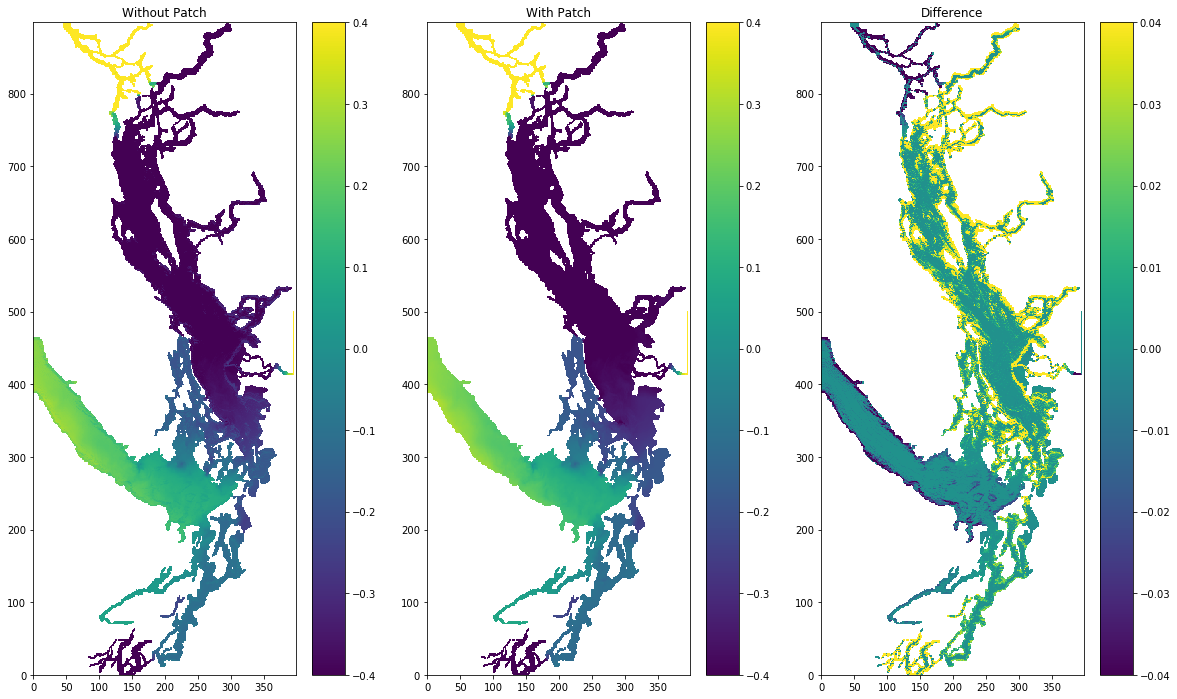

In [7]:
vssh1 = ma.masked_array( np.einsum('kji,kji->ji',VVLA.variables['fse3v_n'][0,...],vmask) - hv_0, mask=1-vmask[0,...])
vssh2 = ma.masked_array( np.einsum('kji,kji->ji',VVLB.variables['fse3v_n'][0,...],vmask) - hv_0, mask=1-vmask[0,...])
c=0.4
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,12))
def show(ax,dta,ttl,K=1):
    mesh = ax.pcolormesh(dta,vmin=-c/K,vmax=c/K)
    fig.colorbar(mesh,ax=ax)
    #viz_tools.set_aspect(ax)
    ax.set_title(ttl)
show(ax1, vssh1, 'Without Patch')
show(ax2, vssh2, 'With Patch')
show(ax3, (vssh1-vssh2), 'Difference', K=10)
plt.savefig('In_V_difference.png', bbox_inches='tight')